In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
# Your local file path
file_path = r'C:\Users\ponia\OneDrive\Desktop\lidocaine plaster analysis\Updated_Lidocaine_Patches_Final.csv'

In [6]:
# Load the data
data = pd.read_csv(file_path)

In [7]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

In [8]:
trend_data = data.groupby(['Health Board', 'date']).agg({'Items': 'sum', 'ActCost': 'sum', 'Quantity': 'sum'}).reset_index()

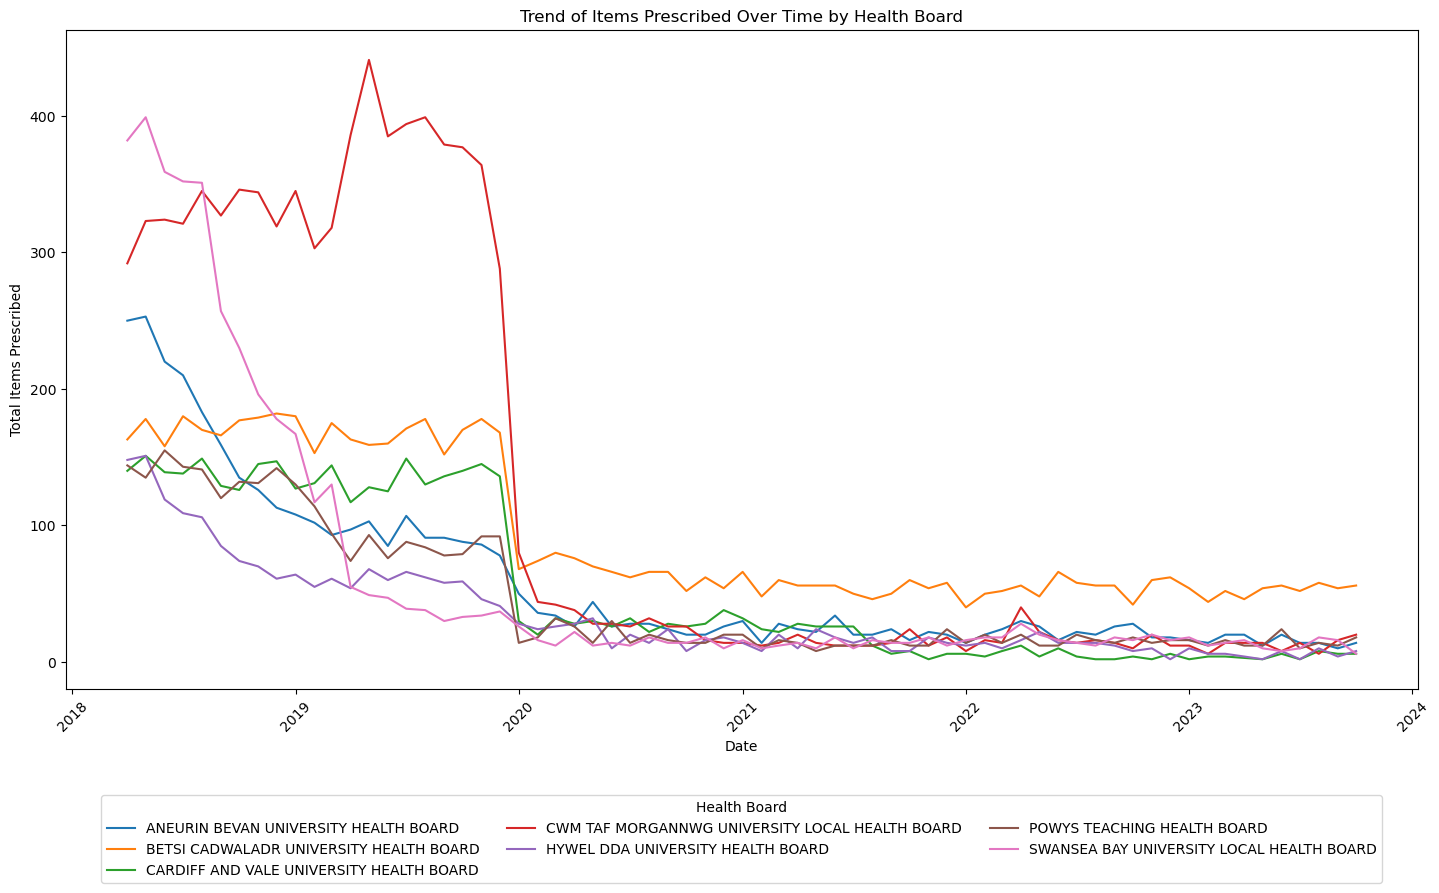

In [10]:
# Plotting trends over time for each health board
plt.figure(figsize=(15, 10))
sns.lineplot(x='date', y='Items', hue='Health Board', data=trend_data)
plt.title('Trend of Items Prescribed Over Time by Health Board')
plt.xlabel('Date')
plt.ylabel('Total Items Prescribed')
plt.xticks(rotation=45)

# Position the legend below the plot
plt.legend(title='Health Board', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

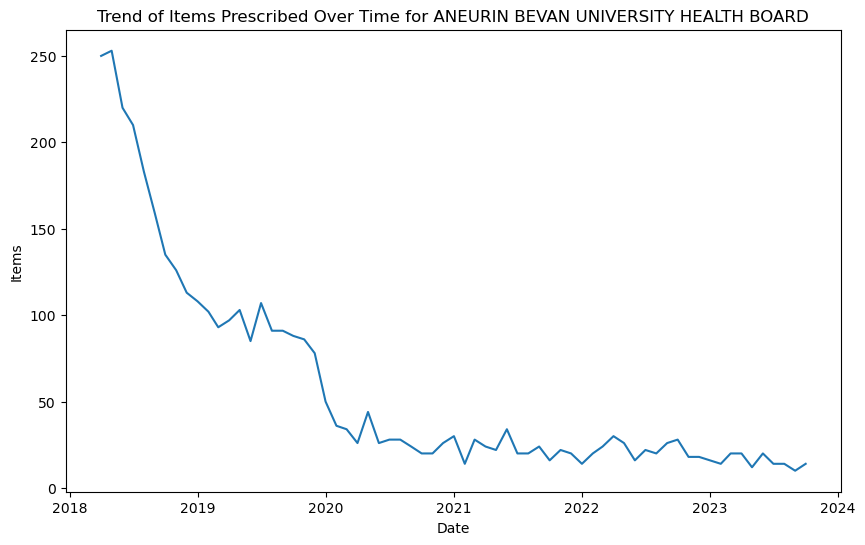

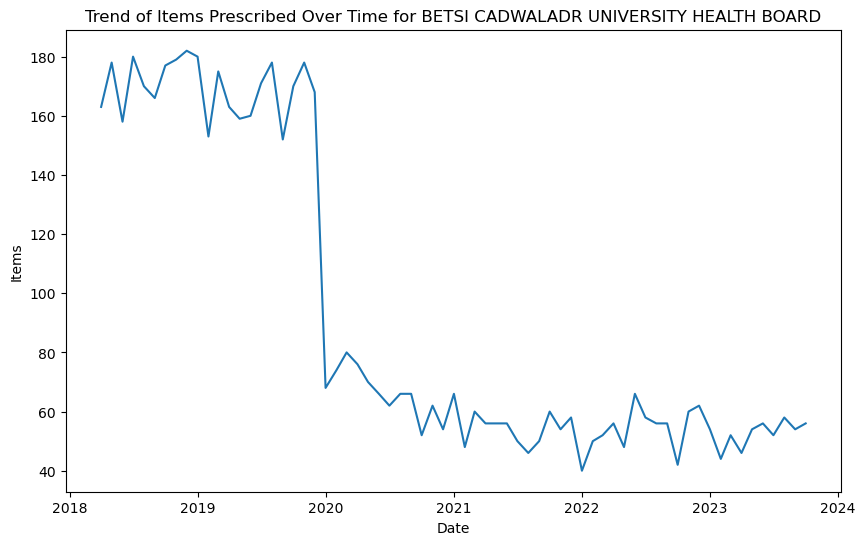

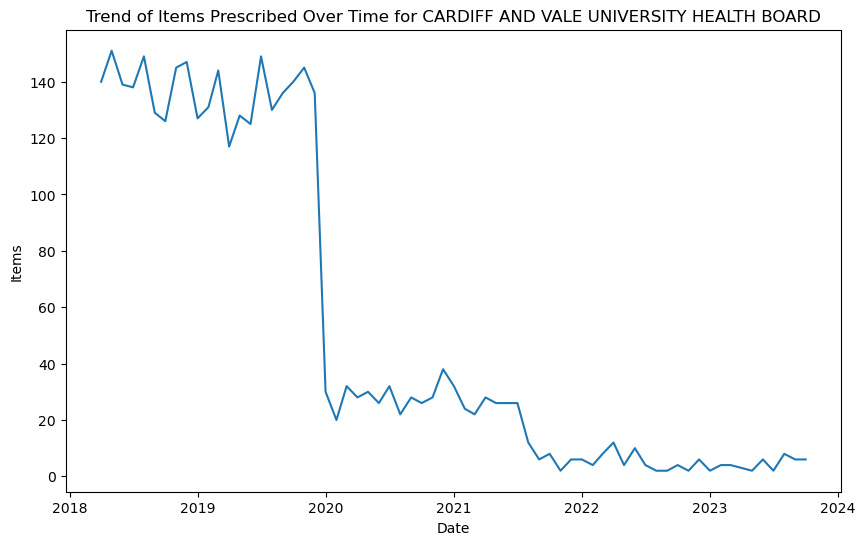

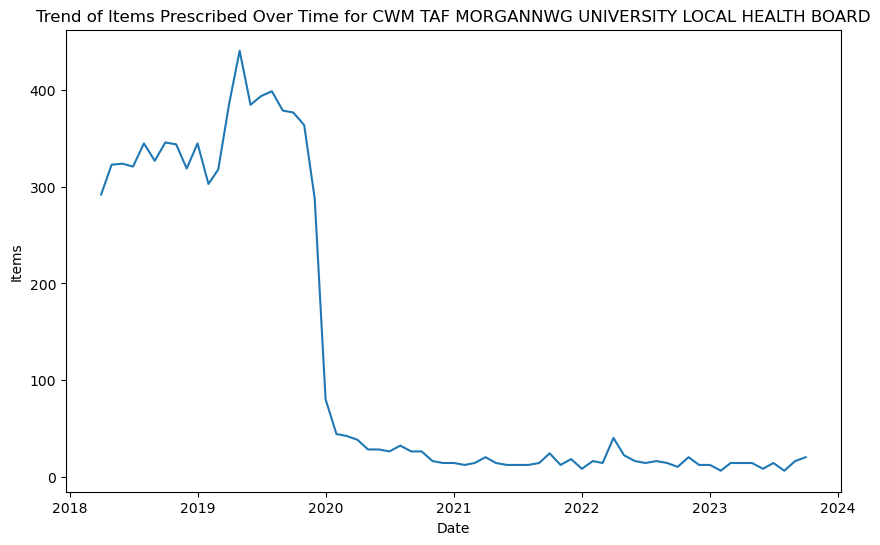

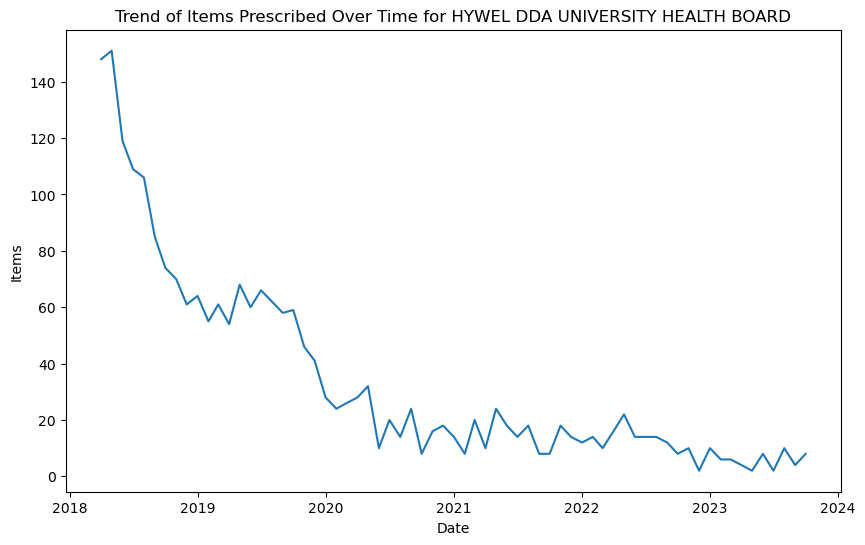

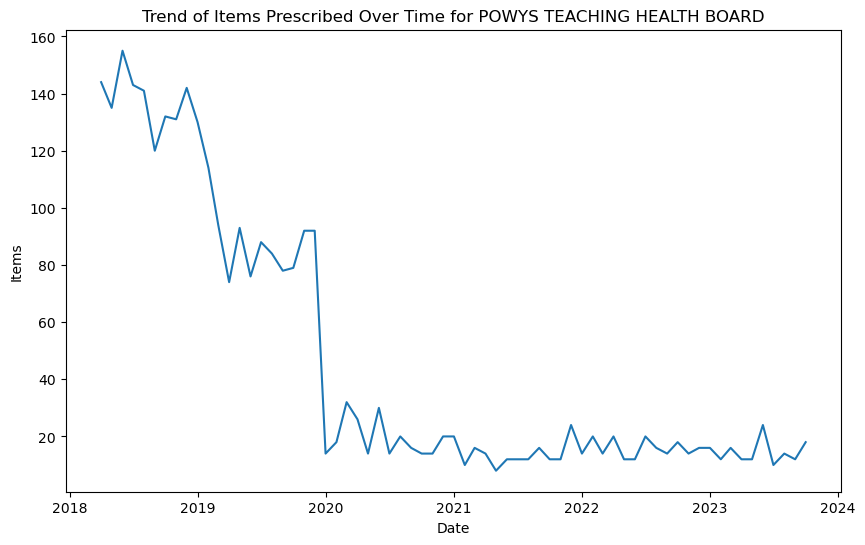

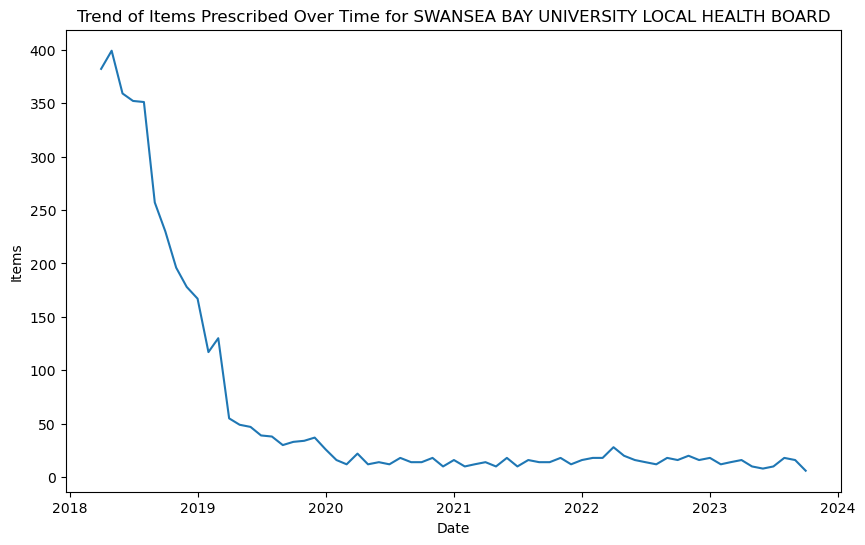

In [11]:
# Separate analysis for each Health Board
for health_board in trend_data['Health Board'].unique():
    # Filter data for the current health board
    board_data = trend_data[trend_data['Health Board'] == health_board]

    # Plotting trends over time for the current health board
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='Items', data=board_data)
    plt.title(f'Trend of Items Prescribed Over Time for {health_board}')
    plt.xlabel('Date')